
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Aprendizagem de Máquina
<br>
**Unidade Curricular:** Modelos, Algoritmos e Estimadores
<br>
**Tema da Semana:** K-Means
<br>


## Aula 3: Aplicações práticas do K-Means

## Tarefa
- Executem o código abaixo.

- Se as bibliotecas não estiverem instaladas, instalem-as.

- Acompanhem as instruções do código.

### 1) Importação das bibliocas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 2) Carregando os dados

In [2]:
# Carregar o dataset
df = pd.read_csv("ecommerce_data.csv")

### 3) Pré-processamento e padronização dos dados

In [3]:
# Converter InvoiceDate para formato de data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remover valores nulos (CustomerID é essencial para segmentação)
df = df.dropna(subset=['CustomerID'])

# Criar a métrica de Valor Monetário (Total gasto por linha da compra)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Definir a data de referência para calcular a recência (última data da base)
reference_date = df['InvoiceDate'].max()

# Construir a Tabela RFM (Recência, Frequência e Valor Monetário)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recência (quanto tempo se passou desde a última compra)
    'InvoiceNo': 'nunique',  # Frequência (número de compras únicas)
    'TotalPrice': 'sum'  # Valor Monetário (gasto total)
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalizar os dados RFM para o clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

### 4) Implementação do método cotovelo para definição do melhor valor para K

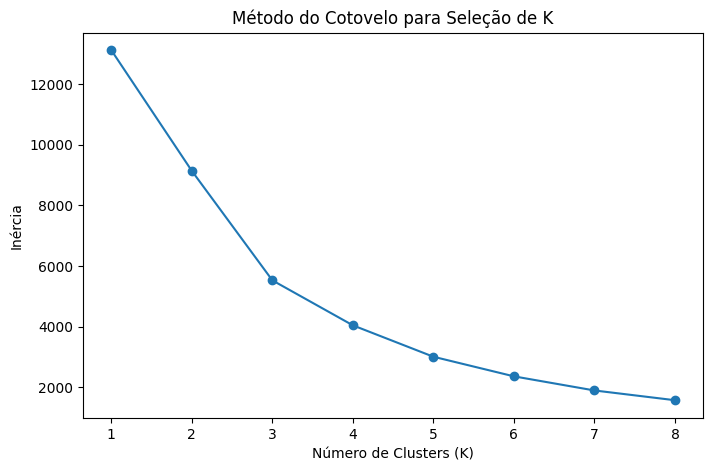

In [4]:
# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
k_values = range(1, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Seleção de K')
plt.show()




### 5) Utilizando o K-Means com o número ideal de clusters (defina K baseado no método do cotovelo)

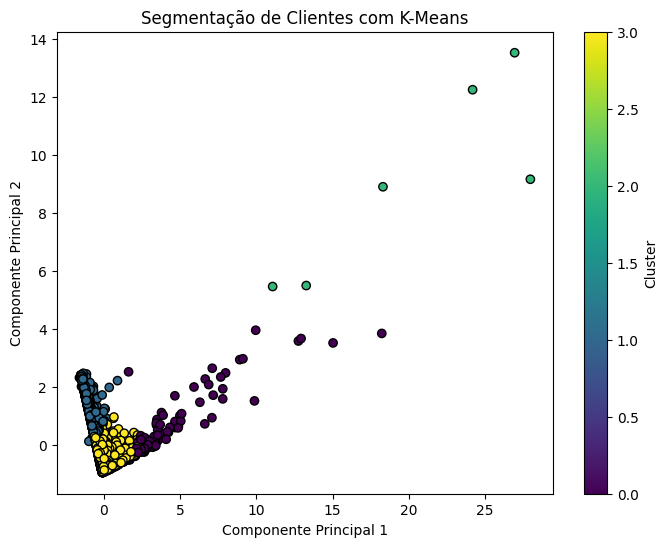

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         325          2      0.00        1
12347.0           1          7   4299.80        3
12348.0          74          4   1797.24        3
12349.0          18          1   1757.55        3
12350.0         309          1    334.40        1


In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(rfm_scaled)

# Adicionar os clusters ao dataframe RFM
rfm['Cluster'] = y_kmeans

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Visualização dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Segmentação de Clientes com K-Means")
plt.colorbar(label='Cluster')
plt.show()

# Exibir os primeiros resultados
print(rfm.head())
